In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import numpy as np 

In [33]:
tokenizer = Tokenizer()

data = open('../lyrics/EN/edsheeran.txt', encoding="utf-8").read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
print(total_words)

2048


In [34]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [35]:
print(max_sequence_len)

22


In [36]:
model = Sequential()
model.add(Embedding(total_words, 160, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(200)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
524/524 [==============================] - 30s 58ms/step - loss: 5.1981 - accuracy: 0.1691
Epoch 2/100
524/524 [==============================] - 31s 59ms/step - loss: 3.3857 - accuracy: 0.3830
Epoch 3/100
524/524 [==============================] - 31s 60ms/step - loss: 2.4692 - accuracy: 0.4909
Epoch 4/100
524/524 [==============================] - 32s 61ms/step - loss: 1.9539 - accuracy: 0.5673
Epoch 5/100
524/524 [==============================] - 31s 60ms/step - loss: 1.6380 - accuracy: 0.6164
Epoch 6/100
524/524 [==============================] - 32s 60ms/step - loss: 1.4308 - accuracy: 0.6571
Epoch 7/100
524/524 [==============================] - 31s 60ms/step - loss: 1.3713 - accuracy: 0.6681
Epoch 8/100
524/524 [==============================] - 32s 60ms/step - loss: 1.3094 - accuracy: 0.6791
Epoch 9/100
524/524 [==============================] - 32s 60ms/step - loss: 1.2927 - accuracy: 0.6803
Epoch 10/100
524/524 [==============================] - 29s 55ms/step - l

In [37]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

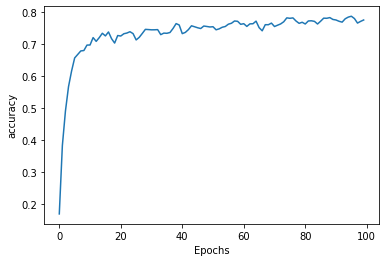

In [38]:
plot_graphs(history, 'accuracy')


In [39]:
def write_song(seed_text, next_words):
	for _ in range(next_words):
		token_list = tokenizer.texts_to_sequences([seed_text])[0]
		token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
		predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
		output_word = ""
		for word, index in tokenizer.word_index.items():
			if index == predicted:
				output_word = word
				break
		seed_text += " " + output_word
	print(seed_text)



In [42]:
write_song(seed_text="next to me", next_words=10)

next to me on me o on me on the sofa no degree


In [10]:
write_song(seed_text="Next to me", next_words=20)

Next to me you ever was in the nightmares you and ask on the tv screen to trip or kisses or do ten


In [11]:
write_song(seed_text="The feeling", next_words=30)

The feeling to end up at the side of the night time and you get the ball quickly reaches man too soon to 505 oh away the identities has yourself de as


In [43]:
model.save("../models/EN/edsheeran")

INFO:tensorflow:Assets written to: ../models/EN/edsheeran\assets
